# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## 

Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
folderPath = "C:\\Users\\42128\\Desktop\\Break Through Tech AI\\Dataset"
# adultDataSet_filename = os.path.join(os.getcwd(), folderPath, "censusData.csv")
# airbnbDataSet_filename = os.path.join(os.getcwd(), folderPath, "airbnbListingsData.csv")
# WHRDataSet_filename = os.path.join(os.getcwd(), folderPath, "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), folderPath, "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)# YOUR CODE HERE

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I choose the bookReviewDataSet.

I am predicting if a book has a positive review. The Positive Review column is the label in the dataset.

This is a supervised learning problem and a binary classfifcation problem.

The feature is the Review column which include raw text data.

This is an important problem because a good sentiment analysis model can help a company to save mannual effort to read each book's review and determine whether if a book's review is positive.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# YOUR CODE HERE
df.describe()

,Review,Positive Review
count,1973,1973
unique,1865,2
top,I have read several of Hiaasen's books and lov...,False
freq,3,993


In [5]:
df.dtypes

Review             object
Positive Review      bool
dtype: object

In [6]:
df.Review[0]

"This was perhaps the best of Johannes Steinhoff's books, since it does not  deal with his own stellar yet tragic WW II and post war career. The  insights of the average person living in Germany are of great importance to  both social and military historians alike. Steinhoff offered this  collective testament as a warning to all of us regarding war and the rise  of a dictator. As Johannes said in an interview, &quot;It is always the  civilians who suffer the most, yet are remembered the least.&quot\n"

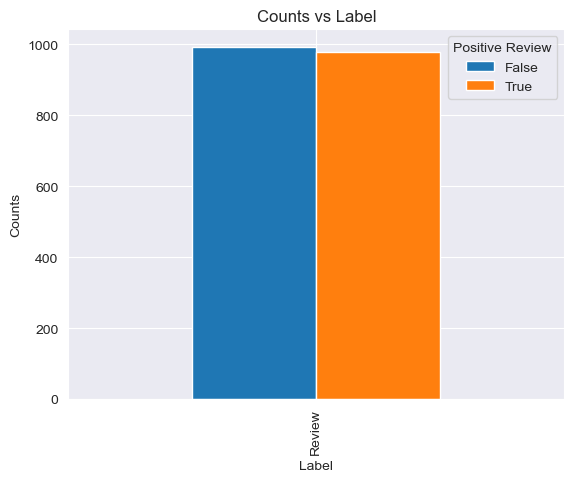

In [7]:
df.groupby("Positive Review").count().T.plot.bar()
plt.xlabel("Label")
plt.ylabel("Counts")
plt.title("Counts vs Label")
plt.show()

I only have two columns in the datatset. The Review column is object type and the Positive Review column is the boolean type.

For my sentiment analysis model, I need data preparation for my Review column because I need preprocess my raw text data and convert them into numerical vector representations.

I counted the frequency of each class in my label. They are closed to each other, so the label does not have the class imbalance problem.

Following the general NLP pipeline: removing stop words, stemming, lemmatization, tokenization, vectorization/word embedding

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

I only have one feature because I choose the bookreview dataset to complete a sentiment analysis project. In my project, the feature is the Review column.

I need feature processing / text preprocessing. In the text preprocessing step, I need to remove stop words, lemmatize sentences, tokenize sentences into prahses, and convert senetences into numerical vector representations. These steps can be completed just by a simple gensim.utils.simple_preprocess() but this method only tokenizes sentences into each single word and does not lemmatize words and remove stop words too many.

Additionally, in the text preprocessing step, I will specifically remove more stop words by genism.remove_stopwords(), lemmatize more words by nltk.lemmatization(), and tokenize sentences into bigrams by genism.Phrase().

I will choose to implement a logistic regression, a random forest, a XGBoosting, a stacking, and a simple sequential model. I may implement a deep averaging neural network if time is permitted

My plans are shown below:

I will preprocess my Review column and convert raw text into numerical vector representations. Then, I will split data into training and testing datatset. Next, I will feed training data to different models and perform the cross validation. Meanwhile, I will use GridSearch to find the best hyperparameters for the ensemble models, and I will mannually find the best hyperparameters for the deep learning model(s). Finally, I will choose the best model based on overall accuracy, validation score, AUC score, ROC, and precision-recall cruve.

Moreover, at the end, I will test four different ways of text preprocessing and include the analysis of these methods:

(1) Text Preprocessing without bigrams (additional lemmatization and removing stop words are included)

(2) Text Preprocessing with bigrams(additional lemmatization and removing stop words are included)

(3) Text Preprcoessing with bigrams, but no additional removing stop words and lemmatization.

(4) Text Preprocessing with only gensim.utils.simple_preprocess.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [8]:
# %pip install gensim
# %pip install nltk
# %pip install xgboost

# %pip install tensorflow

In [9]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import gensim
from gensim.parsing.preprocessing import remove_stopwords
from gensim.models.phrases import Phrases, Phraser

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Input, MaxPooling1D, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
# nltk.download('wordnet')

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [11]:
# YOUR CODE HERE

# Train Test Split
X = df["Review"]
y = df["Positive Review"]

In [12]:
print(X.shape)
print(X.head())

(1973,)
0    This was perhaps the best of Johannes Steinhof...
1    This very fascinating book is a story written ...
2    The four tales in this collection are beautifu...
3    The book contained more profanity than I expec...
4    We have now entered a second time of deep conc...
Name: Review, dtype: object


### Data cleaning and Data Preprocessing

In [13]:
def lemmatization(row, wnl):
    words = []
    for word in row:
        words.append(wnl.lemmatize(word))
    return words

#### (1) Text Preprocessing without bigrams (additional lemmatization and removing stop words are included)

In [14]:
def text_preprocess1(X):
    # remove more stop words
    X = X.apply(lambda row: remove_stopwords(row))

    # remove some stop words, special characters, white spaces, and punctuations
        # do some lemmatization and perform tokenization
    X = X.apply(lambda row: gensim.utils.simple_preprocess(row, min_len=2))

    # Further lemmatization
    wnl = WordNetLemmatizer()
    X = X.apply(lambda row: lemmatization(row, wnl))
    
    return X

#### (2) Text Preprocessing with bigrams (additional lemmatization and removing stop words are included)

In [15]:
def text_preprocess2(X):
    X = X.apply(lambda row: remove_stopwords(row))
    
    X = X.apply(lambda row: gensim.utils.simple_preprocess(row, min_len=2))
    
    wnl = WordNetLemmatizer()
    X = X.apply(lambda row: lemmatization(row, wnl))
    
    # tokenize into 2 Bigrams
    bigram_X = Phrases(X, min_count=2)
    
    return bigram_X, X

#### (3) Text Preprcoessing with bigrams, but no additional removing stop words and lemmatization

In [16]:
def text_preprocess3(X):
    X = X.apply(lambda row: gensim.utils.simple_preprocess(row, min_len=2))
    bigram_X = Phrases(X, min_count=2)
    return bigram_X, X

#### (4) Text Preprocessing with only gensim.utils.simple_preprocess.

In [17]:
def text_preprocess4(X):
    X = X.apply(lambda row: gensim.utils.simple_preprocess(row, min_len=2))    
    return X

#### Choose a text preprocessing method

In [18]:
# choose one method ranging from 1 to 4 described above
method = 4

# if choose a inappropriate method, default by method 1
if method not in [1, 2, 3, 4]:
    method = 1

In [19]:
original_X = X.copy()
bigram_X = 0

In [20]:
if method == 1:
    X = text_preprocess1(X)
elif method == 2:
    bigram_X, X= text_preprocess2(X)
elif method == 3:
    bigram_X, X= text_preprocess3(X)
else:
    X = text_preprocess4(X)

In [21]:
# remove more stop words
# X = X.apply(lambda row: remove_stopwords(row))

# remove some stop words, special characters, white spaces, and punctuations
    # do some lemmatization and perform tokenization
# X = X.apply(lambda row: gensim.utils.simple_preprocess(row, min_len=2))

# Further lemmatization
# wnl = WordNetLemmatizer()
# X = X.apply(lambda row: lemmatization(row, wnl))

# tokenize into 2 Bigrams
# bigram_X = Phrases(X, min_count=2)

In [22]:
# model = gensim.models.Word2Vec(bigram_X[X], min_count=2)

In [23]:
# model.wv.key_to_index

In [24]:
# Does not worth to do futher stemming because this will be considered over-stemming
# ps = PorterStemmer()
# ps.stem("this")

In [25]:
print(original_X[1])

This very fascinating book is a story written in the form of numerous letters and personal diary entries made by the principle character of the book.  It chronicals the life of a young Scottish woman forced to live first in China then Japan.  Well written and historically accurate, it's obvious the author is intimately familiar with the the culture, customs, history and life style of Japan.  This makes the book that much more interesting and fascinating for those who enjoy realism and demand accuracy in a story.  For all who've ever lived in Japan, it's a believable tale that literally makes you feel you've stepped back in a time machine to witness the birth of modern Japan.  For those who haven't lived in Japan, believe that the author has done his homework and is not simply just creating a fictional setting in his mind.  Because of this, he's able to focus on his character versus scene/setting development and thus creates a living breathing person in your mind.  The timespan covers o

### Train Test Split

In [29]:
# 80% training data and 20% testing data
    # The classes in the label roughly have the same distribution
    # bigram_X[X] unpacks the words or the phrases
    # np.array(bigram_X[X]): convert a 2D list to a 2D array 
if method in [2, 3]:
    X_train, X_test, y_train, y_test = train_test_split(
        np.array(bigram_X[X], dtype="object"), y, 
        stratify=y, 
        shuffle=True, 
        test_size=0.2, 
        random_state=1234)
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        stratify=y, 
        shuffle=True, 
        test_size=0.2, 
        random_state=1234)

In [30]:
# check the dimension of each dataset
print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(1578,)
(395,)
['this', 'was', 'perhaps', 'the', 'best', 'of', 'johannes', 'steinhoff', 'books', 'since', 'it', 'does', 'not', 'deal', 'with', 'his', 'own', 'stellar', 'yet', 'tragic', 'ww', 'ii', 'and', 'post', 'war', 'career', 'the', 'insights', 'of', 'the', 'average', 'person', 'living', 'in', 'germany', 'are', 'of', 'great', 'importance', 'to', 'both', 'social', 'and', 'military', 'historians', 'alike', 'steinhoff', 'offered', 'this', 'collective', 'testament', 'as', 'warning', 'to', 'all', 'of', 'us', 'regarding', 'war', 'and', 'the', 'rise', 'of', 'dictator', 'as', 'johannes', 'said', 'in', 'an', 'interview', 'quot', 'it', 'is', 'always', 'the', 'civilians', 'who', 'suffer', 'the', 'most', 'yet', 'are', 'remembered', 'the', 'least', 'quot']


In [31]:
# Check class imbalance
print(y_train.value_counts())
print(y_test.value_counts())

Positive Review
False    794
True     784
Name: count, dtype: int64
Positive Review
False    199
True     196
Name: count, dtype: int64


### Word embedding using Word2Vec model

In [32]:
word2vec_model = gensim.models.Word2Vec(X_train, 
                                       vector_size=100,
                                       window=5,
                                       min_count=2)

#### Method (1): 9340 words 
#### Method (2): 10815 words
#### Method (3): 12663 words
#### Method (4): 10370 words

In [33]:
# the size of the word2VecModel / vocabulary size
print(len(word2vec_model.wv.key_to_index))

10370


In [46]:
# convert vectors into a DataFrame and plot a heatmap
# pd.DataFrame({w:word2vec_model.wv[w] for w in word2vec_model.wv.index_to_key[:10]}).T.style.background_gradient(cmap='coolwarm').set_precision(2)
pd.DataFrame({w:np.round(word2vec_model.wv[w], 2) for w in word2vec_model.wv.index_to_key[:10]}).T.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
the,0.420000,0.150000,-0.060000,0.050000,-0.270000,-1.630000,0.730000,1.330000,-0.860000,-0.910000,-0.140000,-1.160000,-0.560000,0.750000,-0.550000,-0.510000,-0.030000,-0.110000,-0.150000,-0.990000,0.130000,0.740000,1.170000,0.450000,0.350000,-0.080000,-0.170000,0.180000,-0.680000,0.490000,0.860000,0.450000,-0.020000,-1.430000,-0.090000,0.920000,0.760000,-0.330000,-0.250000,-1.010000,-0.820000,0.170000,-1.230000,-0.300000,0.390000,0.130000,-0.600000,0.510000,0.310000,0.330000,0.940000,-0.820000,-0.640000,-0.090000,0.360000,0.540000,0.350000,-0.360000,-0.790000,0.190000,-0.020000,0.320000,-0.250000,-0.570000,-0.310000,0.400000,-0.080000,0.140000,-0.890000,0.610000,0.000000,0.900000,0.810000,-0.370000,0.550000,-0.160000,0.570000,0.370000,-0.190000,0.700000,-0.730000,0.640000,-0.040000,0.600000,-0.360000,-0.940000,0.550000,1.250000,0.640000,0.250000,0.980000,0.610000,0.190000,-0.100000,1.490000,0.290000,0.500000,-1.290000,0.260000,0.590000
of,-0.100000,0.270000,-0.050000,-0.320000,0.260000,-1.810000,0.440000,1.330000,-1.010000,-0.740000,-0.660000,-1.380000,-0.270000,0.770000,0.080000,-0.380000,-0.010000,-0.560000,0.130000,-0.900000,0.030000,0.180000,1.210000,0.480000,0.480000,0.120000,-0.700000,0.290000,-0.570000,0.760000,1.630000,0.250000,-0.510000,-1.630000,0.760000,1.450000,1.220000,0.330000,0.400000,-0.950000,-0.720000,0.020000,-1.050000,0.220000,0.230000,0.210000,-0.460000,0.910000,-0.020000,0.430000,1.280000,-1.120000,-0.560000,-0.230000,-0.090000,1.040000,0.430000,0.240000,-0.790000,0.580000,0.020000,0.620000,0.100000,-0.290000,0.300000,0.020000,0.620000,-0.210000,-0.530000,1.000000,-0.180000,0.540000,0.680000,0.340000,0.520000,0.180000,-0.060000,0.320000,0.120000,0.700000,-0.500000,0.790000,0.300000,-0.060000,-0.400000,-0.570000,0.170000,1.570000,0.980000,0.120000,1.040000,0.830000,0.560000,-0.220000,0.960000,0.080000,0.740000,-1.660000,0.320000,0.360000
and,-0.210000,0.500000,0.040000,-0.190000,0.190000,-1.650000,0.310000,1.630000,-0.580000,-0.810000,-0.520000,-1.280000,-0.320000,0.610000,0.160000,-0.470000,0.030000,-0.740000,0.100000,-1.200000,0.110000,0.240000,0.610000,0.150000,0.160000,0.020000,-0.360000,0.080000,-0.560000,0.550000,1.020000,0.230000,-0.090000,-1.380000,0.190000,1.330000,0.970000,-0.130000,-0.150000,-0.840000,-0.460000,-0.170000,-0.690000,0.020000,0.750000,-0.060000,-0.460000,0.540000,0.140000,0.390000,1.090000,-0.710000,-0.590000,-0.030000,-0.010000,0.730000,0.260000,0.290000,-0.810000,0.600000,-0.080000,0.520000,-0.060000,-0.190000,-0.220000,0.030000,0.350000,0.210000,-0.760000,1.050000,-0.020000,0.600000,0.600000,0.050000,0.610000,0.210000,0.220000,0.130000,-0.520000,0.610000,-0.570000,0.660000,-0.130000,0.300000,-0.540000,-0.340000,0.130000,1.270000,0.930000,0.220000,1.020000,0.540000,0.310000,-0.300000,1.090000,0.580000,0.510000,-1.340000,0.480000,0.320000
to,-0.700000,0.990000,0.270000,-0.090000,0.420000,-1.510000,0.350000,2.020000,-0.150000,-1.080000,-0.190000,-1.150000,-0.270000,0.350000,0.510000,-0.240000,0.560000,-1.090000,-0.030000,-1.720000,0.050000,0.030000,0.390000,-0.260000,-0.430000,0.310000,-0.430000,0.040000,-0.790000,0.250000,0.780000,0.200000,0.140000,-0.970000,-0.250000,1.420000,0.820000,-0.690000,-0.830000,-0.620000,0.390000,-0.710000,0.020000,-0.150000,1.530000,-0.190000,-0.680000,-0.150000,0.250000,0.670000,0.420000,-0.640000,-0.770000,0.170000,-0.490000,0.490000,0.160000,0.470000,-0.720000,0.730000,0.090000,0.350000,0.290000,0.140000,-0.410000,0.140000,-0.050000,0.850000,-0.910000,0.780000,0.010000,0.510000,0.180000,0.240000,0.770000,0.180000,0.070000,-0.020000,-1.120000,0.020000,-0.570000,0.250000,-0.620000,0.850000,-0.750000,-0.130000,0.420000,0.530000,0.520000,-0.080000,0.810000,0.120000,-

### Create feature vectors out of Word Embeddings

#### take the vectors out of the word2Vec model

In [47]:
words = set(word2vec_model.wv.index_to_key)

#### assgin vectors from the word2vec model to the coresponding words in X_train and X_test

In [48]:
print('Begin transforming X_train')
X_train_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_train], dtype=object)
print('Finish transforming X_train')

print('Begin transforming X_test')
X_test_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_test], dtype=object)
print('Finish transforming X_test')

Begin transforming X_train
Finish transforming X_train
Begin transforming X_test
Finish transforming X_test


In [49]:
# The differences between the original text length and embedded text length

print("Number of words in the first training example: {}".format(len(X_train[0])))

print("Number of words in the first embedded traning example: {}".format(len(X_train_word_embeddings[0])))

Number of words in the first training example: 86
Number of words in the first embedded traning example: 179


In [50]:
# However, each example in our training and test data has a different number of features

print("Number of word vectors in the first five examples in training set:")
for w in range(0, 5):
    print(len(X_train_word_embeddings[w]))

print("Number of word vectors in the first five examples in testing set:")
for w in range(0, 5):
    print(len(X_test_word_embeddings[w]))

Number of word vectors in the first five examples in training set:
179
66
15
252
44
Number of word vectors in the first five examples in testing set:
39
43
19
208
331


#### Fill the gaps between the number of feature in an example

#### Since each example has the same number of column, take the element-wise average of each example, so each example has a (100, 1) vector or a list with 100 values

In [51]:
print(X_train_word_embeddings[0].shape)
print(X_train_word_embeddings[1].shape)

(179, 100)
(66, 100)


In [52]:
len(X_train_word_embeddings[0])

179

In [53]:
np.mean(X_train_word_embeddings[0], axis=0).shape

(100,)

In [54]:
print(np.mean(X_train_word_embeddings[0], axis=0))

[-1.98063135e-01  4.68773663e-01  6.07019067e-02  7.37689435e-02
  6.36760369e-02 -7.34317601e-01  2.74317265e-01  9.02691722e-01
 -3.20716828e-01 -4.71624881e-01 -7.15160742e-02 -6.89622760e-01
 -1.03158414e-01  2.67813563e-01  6.89763427e-02 -1.37196511e-01
  1.65749624e-01 -3.50915909e-01  1.87056158e-02 -8.13687384e-01
  1.29699051e-01  1.51154742e-01  2.98680812e-01 -5.93243726e-02
 -6.68949932e-02  1.01085737e-01 -2.49375924e-01 -6.53441176e-02
 -3.90052617e-01  1.68537110e-01  4.50393856e-01  9.81167853e-02
  1.85748667e-01 -5.87643087e-01 -8.67287219e-02  6.08238637e-01
  3.35412920e-01 -2.23200366e-01 -2.75308639e-01 -4.44844365e-01
  6.01440854e-03 -2.70534933e-01 -1.75071597e-01  1.07657183e-02
  4.78985697e-01 -1.29121929e-01 -2.92810410e-01 -9.15271376e-05
  1.67649999e-01  2.19851717e-01  3.09121192e-01 -2.55197287e-01
 -2.01994032e-01  1.31873870e-02 -8.19757804e-02  1.68850780e-01
  1.87057853e-01  3.42047662e-02 -3.30021679e-01  2.38358483e-01
  3.58125195e-02  4.94558

In [55]:
# fill the gaps
X_train_feature_vector = []
for w in X_train_word_embeddings:
    if w.size:
        X_train_feature_vector.append(np.mean(w, axis=0))
    else:
        X_train_feature_vector.append(np.zeros(100, dtype=float))

X_test_feature_vector = []
for w in X_test_word_embeddings:
    if w.size:
        X_test_feature_vector.append(np.mean(w, axis=0))
    else:
        X_test_feature_vectora.append(np.zeros(100, dtype=float))

In [56]:
# the same length and only have one features
for w in range(0, 5):
    print("Length of training example {}: {}".format(w, len(X_train_feature_vector[w])))

Length of training example 0: 100
Length of training example 1: 100
Length of training example 2: 100
Length of training example 3: 100
Length of training example 4: 100


#### Fit a Logistic Regression, RandomForestTree, and GradientBoosted model 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, roc_auc_score

#### Implement Logistic Regression

#### The GirdSearch can suggest what regularization can yield the best result.

In [58]:
# model
lr_params = {
    "C":[5, 100, 500, 10000]
}
lr_model = LogisticRegression(max_iter=10000, random_state=1234)

lr_gridSearch = GridSearchCV(lr_model, param_grid=lr_params, cv=5)

print("lr Begin")
lr_gridSearch.fit(X_train_feature_vector, y_train)
print("lr End")

lr Begin
lr End


In [59]:
lr_best_C = lr_gridSearch.best_params_["C"]
print("The Logistic Regression's best score: {:.2f}".format(lr_gridSearch.best_score_))
print("The logistic regression's best parameters: {}".format(lr_gridSearch.best_params_))

The Logistic Regression's best score: 0.68
The logistic regression's best parameters: {'C': 10000}


#### Train the best Logistic Regression

In [60]:
lr_model = LogisticRegression(C = lr_best_C, max_iter=10000)
lr_model.fit(X_train_feature_vector, y_train)

LogisticRegression(C=10000, max_iter=10000)

#### Implement random forest GridSearch()

#### The GirdSearch can suggest what n_estimator and max_depth yield the best result.

#### The text processing method (3) yields the best result in RF model

In [61]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [62]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [63]:
# The RF parameters
rf_params = {
    "n_estimators" : [1, 5, 10, 20, 30, 40, 50],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [64]:
# RF model and gridSearch()
rf_model = RandomForestClassifier(criterion="log_loss", random_state=1234)
rf_gridS = GridSearchCV(rf_model, param_grid=rf_params, cv=5)

print("RF Begin")
rf_gridS.fit(X_train_feature_vector, y_train)
print("RF End")

RF Begin
RF End


In [65]:
# RF results
rf_max_depth, rf_estimators = rf_gridS.best_params_.values()
print("The best max depth and number of estimators: {}".format(rf_gridS.best_params_))
print("The best accraucy: {:.2f}".format(rf_gridS.best_score_))

The best max depth and number of estimators: {'max_depth': 10, 'n_estimators': 50}
The besr accraucy: 0.65


#### Train the best rf model

In [66]:
rf_bestModel = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_estimators, criterion="log_loss")
rf_bestModel.fit(X_train_feature_vector, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=10, n_estimators=50)

#### Implement XGBoosting through GridSearch()

#### The GridSearch() can suggest what learning rate, n_estimators, and max_depth produce the bes result.

#### The text preprocessing method (3) yields the best result in RF model

In [67]:
XGBClassifier().score

<bound method ClassifierMixin.score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)>

In [68]:
# xgb hyperparameters
xgb_params = {
    "learning_rate":[0.05, 0.1, 0.15, 0.2],
    "n_estimators": [1, 5, 10, 20, 30, 40, 50],
    "max_depth": list(np.arange(1, 11))
}

In [69]:
# xgb model
xgb_model = XGBClassifier(eval_metric=["logloss"], random_state=1234)
xgb_gridS = GridSearchCV(xgb_model, param_grid=xgb_params, cv=5)
print("xgb Begin")
xgb_gridS.fit(X_train_feature_vector, y_train)
print("xgb End")

xgb Begin


C:\Users\42128\miniconda3\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


xgb End


In [70]:
# store the best hyperparameters
xgb_learning_r, xgb_max_depth, xgb_estimators = xgb_gridS.best_params_.values()
print("The best learning rate, max_depth, and n_estimators: {}".format(xgb_gridS.best_params_))
print("The best accuracy: {:.2f}".format(xgb_gridS.best_score_))

The best learning rate, max_depth, and n_estimators: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
The best accuracy: 0.65


#### Train the best xgb model

In [71]:
xgb_bestModel = XGBClassifier(learning_rate=xgb_learning_r, 
                          max_depth=xgb_max_depth, 
                          n_estimators=xgb_estimators,
                         eval_metric=["logloss"])

xgb_bestModel.fit(X_train_feature_vector, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['logloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

#### Implement StackClassifier

#### The text preprocessing method (1) and (3) yields the similar results in stacking. The method (1) and (3) are the best among the all in stacking.

In [72]:
from sklearn.ensemble import StackingClassifier

In [73]:
# set up the models with the best hyperparameters
estimators = [
    ("rf", RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_estimators)),
    ("xgb", XGBClassifier(learning_rate=xgb_learning_r, max_depth=xgb_max_depth, n_estimators=xgb_estimators)),
    ("lr", LogisticRegression(C=lr_best_C,  max_iter=10000))
]

In [74]:
# model
stacking_model = StackingClassifier(estimators=estimators, passthrough=False)
print("Stacking model Begin")
stacking_model.fit(X_train_feature_vector, y_train)
print("Stacking model End")

Stacking model Begin
Stacking model End


In [75]:
stacking_ml_valScore = cross_val_score(stacking_model, X_train_feature_vector, y_train, cv=5)
stacking_ml_valAveScore = np.mean(stacking_ml_valScore) * 100
print(stacking_ml_valScore)
print("The stacking model's average validation score: {:.2f}".format(stacking_ml_valAveScore))

[0.63924051 0.71202532 0.67088608 0.68888889 0.72063492]
The stacking model's average validation score: 68.63


#### Evaluate logistic regression and ensemble models

In [76]:
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve

In [77]:
# Get probability and prediction
print("Begin")
lr_label_prediction = lr_model.predict(X_test_feature_vector)
lr_prob_prediction = lr_model.predict_proba(X_test_feature_vector)

rf_label_prediction = rf_bestModel.predict(X_test_feature_vector)
rf_prob_prediction = rf_bestModel.predict_proba(X_test_feature_vector)

xgb_label_prediction = xgb_bestModel.predict(X_test_feature_vector)
xgb_prob_prediction = xgb_bestModel.predict_proba(X_test_feature_vector)

stacking_ml_label_prediction = stacking_model.predict(X_test_feature_vector)
stacking_ml_prob_prediction = stacking_model.predict_proba(X_test_feature_vector)
print("End")

Begin
End


In [78]:
# check the order of classes
print(lr_model.classes_)
print(rf_gridS.classes_)
print(xgb_gridS.classes_)
print(stacking_model.classes_)

[False  True]
[False  True]
[0 1]
[False  True]


In [82]:
lr_prob_predictionT = lr_prob_prediction[:, 1]
rf_prob_predictionT = rf_prob_prediction[:, 1]
xgb_prob_predictionT = xgb_prob_prediction[:, 1]
stacking_prob_predictionT = stacking_ml_prob_prediction[:, 1]

In [83]:
# Get the log_loss and accuracy
lr_log_loss = log_loss(y_test, lr_label_prediction)
lr_accuracy = accuracy_score(y_test, lr_label_prediction)

xgb_log_loss = log_loss(y_test, xgb_label_prediction)
xgb_accuracy = accuracy_score(y_test, xgb_label_prediction)

rf_log_loss = log_loss(y_test, rf_label_prediction)
rf_accuracy = accuracy_score(y_test, rf_label_prediction)

stacking_ml_log_loss = log_loss(y_test, stacking_ml_label_prediction)
stacking_ml_accuracy = accuracy_score(y_test, stacking_ml_label_prediction)

In [84]:
test_accuracy_results = [lr_accuracy, xgb_accuracy, rf_accuracy, stacking_ml_accuracy]
validation_accuracy_results = [lr_gridSearch.best_score_, xgb_gridS.best_score_, rf_gridS.best_score_, stacking_ml_valAveScore/100]
log_loss_results = [lr_log_loss, xgb_log_loss, rf_log_loss, stacking_ml_log_loss]

#### Test Accuracy and Validation Accuracy

#### The bar plot shows that the stacking model and logistic regression has almost the same test accuracy and validation score in both text processing method (1) and (3)

Test Accuracy: [0.7088607594936709, 0.5949367088607594, 0.6075949367088608, 0.6886075949367089]
Validation Accuracy: [0.6780751456700824, 0.6521257785814749, 0.6483182640144666, 0.6863351416515974]


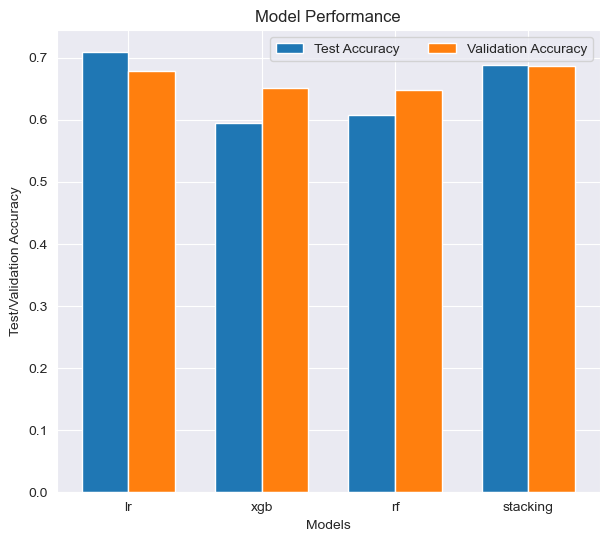

In [85]:
rg = np.arange(4)
width = 0.35

print("Test Accuracy: {}".format(test_accuracy_results))
print("Validation Accuracy: {}".format(validation_accuracy_results))

plt.figure(figsize=(7, 6))
plt.bar(rg, height=test_accuracy_results, width=width, label="Test Accuracy")
plt.bar(rg + width, height=validation_accuracy_results, width=width, label="Validation Accuracy")

labels = ["lr", "xgb", "rf", "stacking"]
plt.xticks(rg + width / 2, labels)

plt.xlabel("Models")
plt.ylabel("Test/Validation Accuracy")

# plt.ylim([0, 1])
plt.title("Model Performance")
plt.legend(loc="upper right", ncol=2)
plt.show()

#### Log-loss

#### The bar plot shows logistic regression and stacking model has almost the same log loss value in both text processing method (1) and (3).

Log-loss: [10.493721872780943, 14.599960866477833, 14.143712089400402, 11.223719916104837]


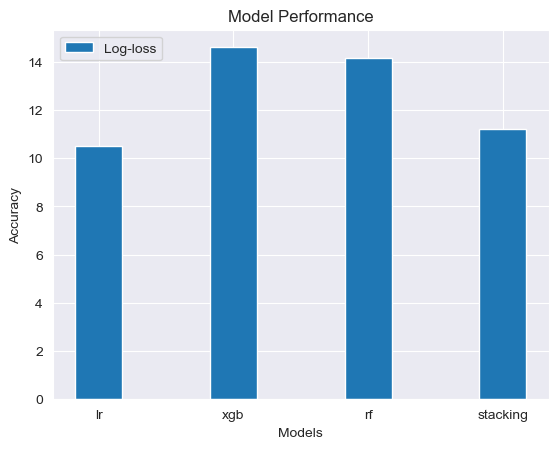

In [86]:
print("Log-loss: {}".format(log_loss_results))

plt.bar(rg, height=log_loss_results, width=width, label="Log-loss")
plt.xticks(rg, labels)

plt.xlabel("Models")
plt.ylabel("Accuracy")

plt.title("Model Performance")
plt.legend(loc="upper left", ncol=2)
plt.show()

#### Precision-Recall cruve

#### Compare four different Precision-Recall cruves, find out stacking model and logistic regression has the similar performance. 

#### However, in text processing method (1), look into the performance of these two models, the lr's PR cruve is above the stacking's PR cruve a bit.

#### In text processing method (3),  the lr's PR cruve is lower than the stacking's PR cruve a bit.

In [87]:
# Obtain precision and recall for each model
lr_precision, lr_recall, lr_threshold = precision_recall_curve(y_test, lr_prob_predictionT)
rf_precision, rf_recall, rf_threshold = precision_recall_curve(y_test, rf_prob_predictionT)
xgb_precision, xgb_recall, xgb_threshold = precision_recall_curve(y_test, xgb_prob_predictionT)
stacking_precision, stacking_recall, stacking_threshold = precision_recall_curve(y_test, stacking_prob_predictionT)

In [88]:
print("The probability of two events(False/True) in first example in lr: {}".format(lr_prob_prediction[0]))
print("The first precision: {}".format(lr_precision[0]))
print("The first recall: {}".format(lr_recall[0]))
print("The first threshold: {}".format(lr_threshold[0]))

The probability of two events(False/True) in first example in lr: [0.8840698 0.1159302]
The first precision: 0.4962025316455696
The first recall: 1.0
The first threshold: 0.0028556470261048867


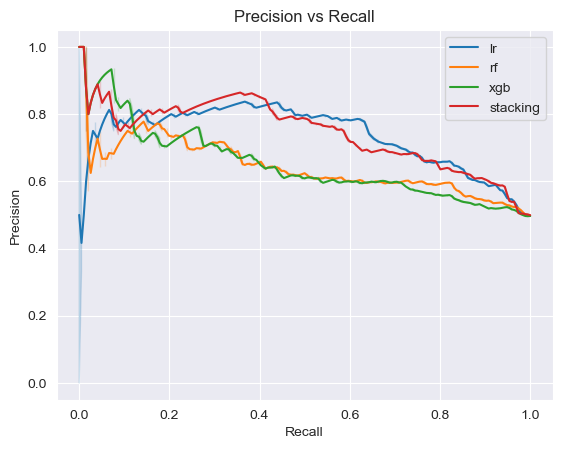

In [89]:
sns.lineplot(x=lr_recall, y=lr_precision, label="lr")
sns.lineplot(x=rf_recall, y=rf_precision, label="rf")
sns.lineplot(x=xgb_recall, y=xgb_precision, label="xgb")
sns.lineplot(x=stacking_recall, y=stacking_precision, label="stacking")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall")
plt.show()

#### ROC/AUC

#### Through the AUC metrics, the logistic regression and the stacking model has almost the same AUC score. 

#### However, in text processing method (1), through the ROC plot, concisely, the logistic regression ROC's cover a wider area, so the losgitic regression is slightly better than the stacking model. 

#### In the text processing method (3), the findings above may be reversed or achieve the the same AUC

In [90]:
from sklearn.metrics import roc_curve

In [91]:
# Obtain the false positive and true positive rate of each model
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr_prob_predictionT)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_prob_predictionT)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_test, xgb_prob_predictionT)
stacking_fpr, stacking_tpr, stacking_threshold = roc_curve(y_test, stacking_prob_predictionT)

In [92]:
# logistic regression example
print("The probability of two events(False/True) in first example in lr: {}".format(lr_prob_prediction[1]))
print("The first false positive rate: {}".format(lr_fpr[1]))
print("The first true positive rate: {}".format(lr_tpr[1]))
print("The first threshold: {}".format(lr_threshold[1]))

The probability of two events(False/True) in first example in lr: [0.56544438 0.43455562]
The first false positive rate: 0.005025125628140704
The first true positive rate: 0.0
The first threshold: 0.9893194979704408


#### calculate AUC

In [93]:
from sklearn.metrics import auc

In [94]:
lr_auc = auc(lr_fpr, lr_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)
stacking_auc = auc(stacking_fpr, stacking_tpr)

In [95]:
print("lr's auc: {:.2f}".format(lr_auc))
print("rf's auc: {:.2f}".format(rf_auc))
print("xgb's auc: {:.2f}".format(xgb_auc))
print("stacking's auc: {:.2f}".format(stacking_auc))

lr's auc: 0.77
rf's auc: 0.66
xgb's auc: 0.65
stacking's auc: 0.76


#### Plot ROC

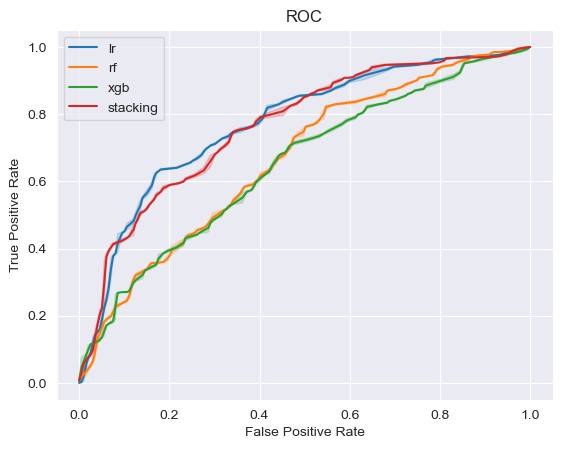

In [96]:
sns.lineplot(x=lr_fpr, y=lr_tpr, label="lr")
sns.lineplot(x=rf_fpr, y=rf_tpr, label="rf")
sns.lineplot(x=xgb_fpr, y=xgb_tpr, label="xgb")
sns.lineplot(x=stacking_fpr, y=stacking_tpr, label="stacking")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.show()

#### Comparing the models above, the logistic regression outperform. I would compare the logistic regression to a deep learning model to see if a deep learning model is better.

#### Neural Network

In [97]:
voca_size = len(word2vec_model.wv.index_to_key)
voca_size

10370

In [98]:
# a simple sequential model
seq_model = keras.Sequential()

input_layer = keras.layers.InputLayer(input_shape=(100,))
seq_model.add(input_layer)

hidden_layer1 = keras.layers.Dense(units=128, activation="relu")
seq_model.add(hidden_layer1)
seq_model.add(keras.layers.Dropout(0.4))

hidden_layer2 = keras.layers.Dense(units=64, activation="relu")
seq_model.add(hidden_layer2)
seq_model.add(keras.layers.Dropout(0.4))

hidden_layer3 = keras.layers.Dense(units=32, activation="relu")
seq_model.add(hidden_layer3)
seq_model.add(keras.layers.Dropout(0.4))

hidden_layer4 = keras.layers.Dense(units=16, activation="relu")
seq_model.add(hidden_layer4)
seq_model.add(keras.layers.Dropout(0.4))

output_layer = keras.layers.Dense(units=1, activation="sigmoid")
seq_model.add(output_layer)

seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

In [99]:
# use adam as the optimizer
adam = keras.optimizers.Adam(learning_rate=0.1)
sgd = keras.optimizers.SGD(learning_rate=0.05)

In [100]:
# define the loss function
loss_fun = keras.losses.BinaryCrossentropy(from_logits=False)

In [101]:
# compile the seq_model
seq_model.compile(
    loss=loss_fun,
    optimizer=adam,
    metrics="accuracy"
)

In [41]:
# used in callback=[] to only output the training information every n epoch
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [103]:
# train the sequential model
num_epochs = 100
seq_model_history = seq_model.fit(
    np.array(X_train_feature_vector),
    y_train,
    epochs=num_epochs,
    verbose=0,
    validation_split=0.2,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)]
)

Epoch [5/ 100], Loss: 0.6953, Accuracy: 0.5008, Val_loss: 0.6931, Val_accuracy: 0.5127
Epoch [10/ 100], Loss: 0.6976, Accuracy: 0.4723, Val_loss: 0.6940, Val_accuracy: 0.4873
Epoch [15/ 100], Loss: 0.6959, Accuracy: 0.4881, Val_loss: 0.6934, Val_accuracy: 0.5127
Epoch [20/ 100], Loss: 0.6944, Accuracy: 0.4913, Val_loss: 0.6928, Val_accuracy: 0.5127
Epoch [25/ 100], Loss: 0.6943, Accuracy: 0.4945, Val_loss: 0.7007, Val_accuracy: 0.4873
Epoch [30/ 100], Loss: 0.6985, Accuracy: 0.4849, Val_loss: 0.6935, Val_accuracy: 0.5127
Epoch [35/ 100], Loss: 0.6955, Accuracy: 0.4913, Val_loss: 0.6928, Val_accuracy: 0.5127
Epoch [40/ 100], Loss: 0.6972, Accuracy: 0.4723, Val_loss: 0.6938, Val_accuracy: 0.4873
Epoch [45/ 100], Loss: 0.6967, Accuracy: 0.4802, Val_loss: 0.6954, Val_accuracy: 0.4873
Epoch [50/ 100], Loss: 0.6947, Accuracy: 0.5040, Val_loss: 0.6973, Val_accuracy: 0.5127
Epoch [55/ 100], Loss: 0.6968, Accuracy: 0.4849, Val_loss: 0.6930, Val_accuracy: 0.5127
Epoch [60/ 100], Loss: 0.6971, Ac

In [104]:
# loss and test accuracy
seq_model_loss, seq_model_testing_accuracy = seq_model.evaluate(np.array(X_test_feature_vector), y_test)
print('Loss: ', str(seq_model_loss) , 'Accuracy: ', str(seq_model_testing_accuracy))

13/13 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5038
Loss:  0.6933093070983887 Accuracy:  0.5037974715232849


In [105]:
# probability prediction
seq_model_prob_prediction = seq_model.predict(np.array(X_test_feature_vector))

13/13 [==============================] - 0s 2ms/step


In [106]:
# label prediction
seq_model_label_prediction = [1 if i >= 0.5 else 0 for i in seq_model_prob_prediction]

In [107]:
# log loss, precision-recall cruve, ROC, and AUC
seq_log_loss = log_loss(y_test, seq_model_label_prediction)
seq_precision, seq_recall, seq_threshold = precision_recall_curve(y_test, seq_model_prob_prediction)
seq_fpr, seq_tpr, seq_threshold = roc_curve(y_test, seq_model_prob_prediction)
seq_auc = auc(seq_fpr, seq_tpr)

#### Compare the sequential neural network's performance to other model's performance

In [108]:
print("Sequential model's AUC: {}".format(seq_auc))
print("Sequential model's log loss: {:.2f}".format(seq_log_loss))

Sequential model's AUC: 0.4975258947800225
Sequential model's log loss: 17.88


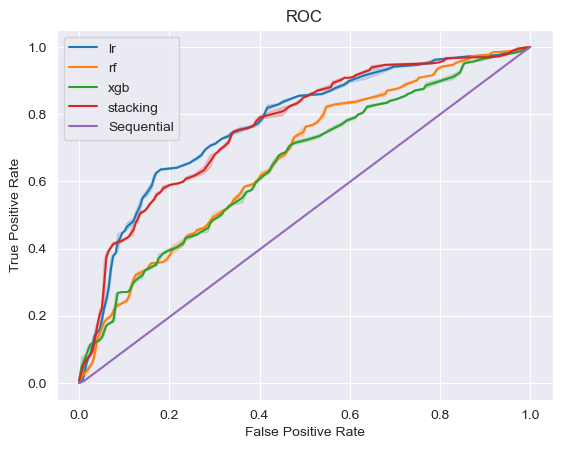

In [109]:
# ROC and AUC
sns.lineplot(x=lr_fpr, y=lr_tpr, label="lr")
sns.lineplot(x=rf_fpr, y=rf_tpr, label="rf")
sns.lineplot(x=xgb_fpr, y=xgb_tpr, label="xgb")
sns.lineplot(x=stacking_fpr, y=stacking_tpr, label="stacking")
sns.lineplot(x=seq_fpr, y=seq_tpr, label="Sequential")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.show()

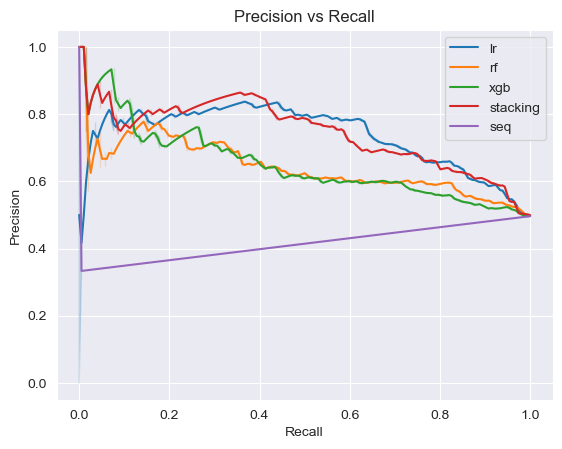

In [110]:
sns.lineplot(x=lr_recall, y=lr_precision, label="lr")
sns.lineplot(x=rf_recall, y=rf_precision, label="rf")
sns.lineplot(x=xgb_recall, y=xgb_precision, label="xgb")
sns.lineplot(x=stacking_recall, y=stacking_precision, label="stacking")
sns.lineplot(x=seq_recall, y=seq_precision, label="seq")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall")
plt.show()

In [111]:
log_loss_results.append(seq_log_loss)
labels.append("Sequential")

#### Log-loss

Log-loss: [10.493721872780943, 14.599960866477833, 14.143712089400402, 11.223719916104837, 17.884952061435346]


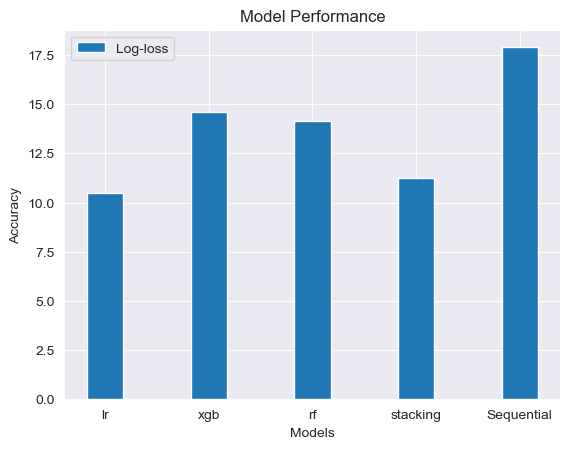

In [112]:
rg = np.arange(0, 5)
print("Log-loss: {}".format(log_loss_results))

plt.bar(rg, height=log_loss_results, width=width, label="Log-loss")
plt.xticks(rg, labels)

plt.xlabel("Models")
plt.ylabel("Accuracy")

plt.title("Model Performance")
plt.legend(loc="upper left", ncol=2)
plt.show()

#### From the results in the sequential neural network, know that the neural network does not perform well. The neural network does not even capture the information of data. This is undefitting.

#### Deep Averging Neural Network (DANN)

#### Tokenize words by Tokenizer() in tensorflow

In [27]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

#### Pad the sequences to have the same length by pad_sequences() in tensorflow

In [28]:
# find the max length of the sequence for dimension of the input layer
max_length = max(len(seq) for seq in sequences)

# pad the sequences
X = pad_sequences(sequences, maxlen=max_length, padding='post')

# Convert labels to numpy array
y = np.array(y)

#### Train test split

In [29]:
# create other training and testing datatset for DANN
X_train_DANN, X_test_DANN, y_train_DANN, y_test_DANN = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    shuffle=True, 
                                                    random_state=1234)

#### Specify the embedding dimension and achieve the vocabulary size from the tokenizer()

In [30]:
# Parameters for the Embedding layer
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size
embedding_dim = 50  # Embedding dimensions

#### Build the DANN

#### Since we need to concatenate the outputs of GlobalMaxPooling1D and GlobalAveragePooling1D, we can't use Sequential API directly. Instead, we will create a Model using functional API.

In [34]:
# Input Layer
input_layer = tf.keras.Input(shape=(max_length, ))

# Embedding layer
embedding_layer = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)

# Global Max Pooling layer to find the max embeddings
max_pooling_layer = tf.keras.layers.GlobalMaxPool1D()(embedding_layer)

# Global Average Pooling layer to average the embeddings
average_pooling_layer = tf.keras.layers.GlobalAveragePooling1D()(embedding_layer)

# concatenated the outputs of global max and average pooling layer
concatenated_layer = tf.keras.layers.Concatenate()([max_pooling_layer, average_pooling_layer])

# hidden layers
hidden_layer1 = tf.keras.layers.Dense(units=64, activation="relu")(concatenated_layer)
hidden_layer2 = tf.keras.layers.Dense(units=32, activation="relu")(hidden_layer1)
hidden_layer3 = tf.keras.layers.Dense(units=16, activation="relu")(hidden_layer2)

# output layer
output_layer = tf.keras.layers.Dense(units=1, activation="sigmoid")(hidden_layer3)

# Define DANN model
DANN_model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

#### Define optimizer

In [36]:
adam_optimizer_DANN = tf.keras.optimizers.Adam(learning_rate=0.1)
sgd_optimizer_DANN = tf.keras.optimizers.SGD(learning_rate=0.1)

#### Define loss function

In [38]:
loss_fucn_DANN = tf.keras.losses.BinaryCrossentropy(from_logits=False)

#### Complie DANN model

In [44]:
DANN_model.compile(optimizer=adam_optimizer_DANN, loss=loss_fucn_DANN, metrics=["accuracy"])

#### Run DANN model

In [ ]:
epochs = 50

DANN_model.fit(
    X_train_DANN, 
    y_train_DANN, 
    epochs=epochs,
    validation_split=0.2,
    verbose=0,
    callbacks=([ProgBarLoggerNEpochs(epochs, every_n=5)])
)

Epoch [5/ 50], Loss: 0.7028, Accuracy: 0.4945, Val_loss: 0.7101, Val_accuracy: 0.4873
Epoch [10/ 50], Loss: 0.7064, Accuracy: 0.5119, Val_loss: 0.6947, Val_accuracy: 0.4873
Epoch [15/ 50], Loss: 0.7013, Accuracy: 0.4865, Val_loss: 0.6939, Val_accuracy: 0.5127
Epoch [20/ 50], Loss: 0.7040, Accuracy: 0.4834, Val_loss: 0.6934, Val_accuracy: 0.4873
Epoch [25/ 50], Loss: 0.7016, Accuracy: 0.5055, Val_loss: 0.6936, Val_accuracy: 0.4873
Epoch [30/ 50], Loss: 0.7046, Accuracy: 0.4675, Val_loss: 0.6934, Val_accuracy: 0.4873
Epoch [35/ 50], Loss: 0.7028, Accuracy: 0.5040, Val_loss: 0.6942, Val_accuracy: 0.4873
Epoch [40/ 50], Loss: 0.6990, Accuracy: 0.5135, Val_loss: 0.7217, Val_accuracy: 0.4873
Epoch [45/ 50], Loss: 0.7046, Accuracy: 0.5008, Val_loss: 0.6929, Val_accuracy: 0.5127


#### The deep averging neural network does not help because the DANN model still cannot captaure the information of the data shown by the training and the validation accuracy. This is the underfitting again and indicates that the deep learning may not be a good fit for this datatset.

#### Results:

#### Check out the accuracy and the log loss in the following order: lr, xgb, rf, stacking, sequential

#### Text preprcoessing method (1):

Test Accuracy: [0.7367088607594937, 0.5822784810126582, 0.5240506329113924, 0.7189873417721518]

Validation Accuracy: [0.6723990355635927, 0.5868213783403656, 0.5842616033755275, 0.6888708057062487]

Log-loss: [9.489974563210593, 15.056209643555267, 17.154954018111454, 10.128722851118999]

lr's auc: 0.79

rf's auc: 0.59

xgb's auc: 0.59

stacking's auc: 0.78

#### Text preprcoessing method (2):

Test Accuracy: [0.5443037974683544, 0.5721518987341773, 0.5341772151898734, 0.5949367088607594]

Validation Accuracy: [0.5614848302190074, 0.5640124573035965, 0.5493932087602974, 0.5811271850512357]

Log-loss: [16.42495597478756, 15.421208665217213, 16.789954996449506, 14.599960866477833]

lr's auc: 0.58

rf's auc: 0.54

xgb's auc: 0.59

stacking's auc: 0.61

#### Text preprocessing method (3):

Test Accuracy: [0.6658227848101266, 0.620253164556962, 0.5974683544303797, 0.6658227848101266]

Validation Accuracy: [0.6438537271448663, 0.6185091420534459, 0.6090275266224633, 0.6571609403254972]

Log-loss: [12.044967714844212, 13.687463312322967, 14.508711111062347, 12.044967714844212]

lr's auc: 0.70

rf's auc: 0.63

xgb's auc: 0.63

stacking's auc: 0.71

#### Text preprocessing method (4):

Test Accuracy: [0.7291139240506329, 0.6227848101265823, 0.5949367088607594, 0.7316455696202532]

Validation Accuracy: [0.6926562186055858, 0.6527345790636929, 0.6407112718505122, 0.6933011854530843]

Log-loss: [9.763723829457051, 13.59621355690748, 14.599960866477833, 9.672474074041565]

lr's auc: 0.79

rf's auc: 0.65

xgb's auc: 0.68

stacking's auc: 0.78

#### The results shown above is from my experiments, the results may be various because I set shuffle parameter in the train_test_split()

#### Number of words after different text preprocessing methods
Method (1): 9340 words

Method (2): 10815 words

Method (3): 12663 words

Method (4): 10370 words

#### Conclusion: The text preprocessing method (1) and (4) help the logistic regression and the stacking model yield the best results. 

#### The random forest and the XGBoosting underperform in the method (1) and (2), but they perform not bad in the method (3) and (4). Guess the reasons is that the additional removing stop words and lemmatization reduce some meaningful text in the dataset. Moreover, the random forest and the XGBoosting is the tree algorithm based. Tree algorithm traces the pattern of the data. Given more text and meaningful text, the generalization in these two model is better. 

#### One drawback to use the tree algorithm in a NLP task, I cannot optimize min_sample_leaf and min_sample_split in NLP. The reason is that each example has 100 features, but these features are in the Review column which is the only one feature we have in the dataset. Each row has 100 features but actually they are the numerical vector representations of each word, so we cannot split the vectors.

#### I would suggest that the model perform not bad in method (3) because none of the model's AUC is under 60%. If I only can choose one model to deploy, I would choose the logistic regression with the method (1) or (4). 

#### Even though the stacking model can perform the same as lr, the stacking model is more complex because it consists of lr, xgb, and rf. Moreover, logistic regression is simpler and based on probabilistic prediction. As a result, I would choose to deploy the logistic regression instead of the stacking model.

#### I can see that the stacking model generalize its results most likely based on logistic regression because logistic regression always has the better performance than rf and xgb.